In [9]:
from common_dependencies import *

# Extracting peptide sequence + formatting
peptide_sequences = pd.read_excel(PATH + '/Positive KI.xlsx')
peptide_sequences = peptide_sequences.replace(r"^ +| +$", r"", regex=True)
peptide_sequences = peptide_sequences[['Seq', 'KI (nM)']]
peptide_sequences.rename(columns={'Seq':'Name'}, inplace=True)

# Feature Extraction
df = pd.DataFrame()
for i in range(len(peptide_sequences)):
    df = pd.concat([df, inferenceSingleSeqence(peptide_sequences.iloc[i][0])])

# Merging into a single dataframe. Removing extra seq column and others.
df = pd.merge(df, peptide_sequences)
df = df.drop(columns=['Seq','Helix','Turn','Sheet'])

df.drop(df[df['KI (nM)'] >= 75000].index, inplace=False)


,Name,SeqLength,Weight,Aromaticity,Instability,IsoelectricPoint,A,R,N,D,...,VK,VM,VF,VP,VS,VT,VW,VY,VV,KI (nM)
0,ECENTECPRACPGEYEFDEDGCNTCVCKGCDDAQCRCSSDANGCES...,67,7256.8885,0.044776,52.017910,4.173483,7.463,5.970,7.463,8.955,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.000012
1,RPGGGGADYEPIPEEAAE,18,1814.8597,0.055556,63.955556,4.118235,16.667,5.556,0.000,5.556,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.024000
2,RPLGGGADYEPIPEEAAE,18,1870.9660,0.055556,57.100000,4.118235,16.667,5.556,0.000,5.556,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.000120
3,RPFGGGADYEPIPEEAAE,18,1904.9822,0.111111,67.800000,4.118235,16.667,5.556,0.000,5.556,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.000510
4,RPHGGGADYEPIPEEAAE,18,1894.9477,0.055556,51.338889,4.426530,16.667,5.556,0.000,5.556,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.000910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,NRYSVCTETGQNLCLCEGSDLCSLDNHCEIGSNGKNRCVKGEGKPK...,69,7678.4103,0.043478,41.808696,4.838499,0.000,2.899,8.696,7.246,...,1.47,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,2970.000000
61,MAADISQWAGPLCLQEVDEPPQHALRVDYAGVTVDELGKVLTPTQV...,187,20830.1908,0.096257,28.936898,5.190162,4.813,3.743,3.209,8.021,...,0.00,0.54,0.0,0.54,0.0,0.54,0.54,0.54,0.54,380.000000
62,FPRPGGNGDFEEIPEEYL,18,2066.1825,0.166667,71.233333,4.050028,0.000,5.556,5.556,5.556,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,64.500000
63,CPHAKHRVCGANGEVYDNECFLNKAGIEPAESWETCRGHE,40,4458.8625,0.075000,48.925000,5.470378,10.000,5.000,7.500,2.500,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,2.56,0.00,4000.000000


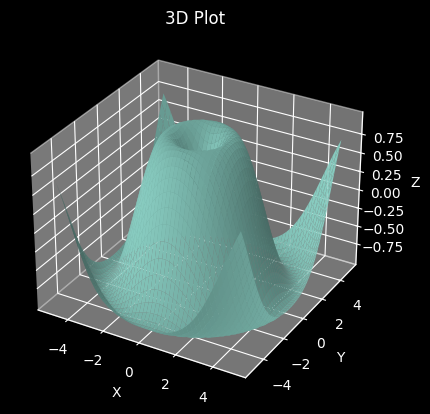

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# create some sample data
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

# set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot')

plt.show()

In [11]:
import os
import pandas as pd

from common_dependencies import *
df_param_combos = pd.read_csv(PATH + '/Regression Only Results/GridSearch Data.csv')

In [12]:
def import_data(threshold):
    """
    Import the full dataset from the current path.  Also apply some of the necessary preprocessing.

    Parameters
    ----------
    None

    Returns
    -------
    df:  Dataframe of the full KI training dataset, with any values above 50,000 removed.

    """

    # Extracting peptide sequence + formatting
    peptide_sequences = pd.read_excel(PATH + '/Positive_KI.xlsx')
    peptide_sequences = peptide_sequences.replace(r"^ +| +$", r"", regex=True)
    peptide_sequences.rename(columns={'Sequence':'Name'}, inplace=True)

    # Feature Extraction
    df = pd.DataFrame()
    for i in range(len(peptide_sequences)):
        df = pd.concat([df, inferenceSingleSeqence(peptide_sequences.iloc[i][0])])

    # Merging into a single dataframe. Removing extra seq column and others.
    df = pd.merge(df,peptide_sequences)
    df = df.drop(columns=['Seq','Helix','Turn','Sheet'])

    # Creates a column in our dataframe to classify into 3 separate buckets.  A 'small' and 'large' bucket
    # based on the threshold, and a 'do not measure bucket' for anything with a KI value of > 4000   
    df['Bucket'] = pd.cut(x=df['KI (nM)'], bins=(0, threshold, 4000, float('inf')), labels=(0,1,2))

    return df

In [15]:
x = df[df.columns[1:573]]

from sklearn.decomposition import PCA


,SeqLength,Weight,Aromaticity,Instability,IsoelectricPoint,A,R,N,D,C,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,67,7256.8885,0.044776,52.017910,4.173483,7.463,5.970,7.463,8.955,23.881,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
1,18,1814.8597,0.055556,63.955556,4.118235,16.667,5.556,0.000,5.556,0.000,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
2,18,1870.9660,0.055556,57.100000,4.118235,16.667,5.556,0.000,5.556,0.000,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
3,18,1904.9822,0.111111,67.800000,4.118235,16.667,5.556,0.000,5.556,0.000,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
4,18,1894.9477,0.055556,51.338889,4.426530,16.667,5.556,0.000,5.556,0.000,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,187,20830.1908,0.096257,28.936898,5.190162,4.813,3.743,3.209,8.021,1.604,...,1.61,0.0,0.54,0.0,0.54,0.0,0.54,0.54,0.54,0.54
62,18,2066.1825,0.166667,71.233333,4.050028,0.000,5.556,5.556,5.556,0.000,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
63,40,4458.8625,0.075000,48.925000,5.470378,10.000,5.000,7.500,2.500,10.000,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,2.56,0.00
64,65,6985.4709,0.046154,49.312308,4.050028,0.000,0.000,7.692,6.154,9.231,...,0.00,0.0,0.00,0.0,0.00,0.0,1.56,0.00,0.00,0.00


In [19]:
peptide_sequences = pd.read_excel(PATH + '/Positive KI.xlsx')
peptide_sequences = peptide_sequences[['Seq', 'KI (nM)']]
peptide_sequences.rename(columns={'Seq':'Name'}, inplace=True)


In [20]:
df = pd.DataFrame()
for i in range(len(peptide_sequences)):
    df = pd.concat([df, inferenceSingleSeqence(peptide_sequences.iloc[i][0])])

In [ ]:
df_param_combos['param_C'][df_param_combos['param_gamma'] == 'auto']

In [ ]:
gammas = ('auto', 'scale')

# Creating pltos for both of the 'auto' and 'scale' gammas
for gamma in gammas:
    # x y and z
    x_grid = df_param_combos['param_C'][df_param_combos['param_gamma'] == gamma]
    y_grid = df_param_combos['param_epsilon'][df_param_combos['param_gamma'] == gamma]
    z_grid = df_param_combos['mean_test_score'][df_param_combos['param_gamma'] == gamma]*(-1)

    # Create the figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_grid, y_grid, z_grid)
    ax.set_title("Dot plot of RMSE given 'C' and 'epsilon' values for '%s' gamma Parameter" %(gamma))
    ax.set_xlabel('C')
    ax.set_ylabel('epsilon')
    ax.set_zlabel('Test RMSE')

    fig.savefig(PATH + '/Figures/RMSE plot for gamma %s.png' %(gamma))

In [ ]:
gammas = ('auto', 'scale')
for gamma in gammas:
    print(gamma)


In [ ]:
fig.clf()

In [ ]:
fig